In [1]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
fact_table = pd.read_excel(r'sales_data.xlsx', sheet_name='Fact_table', engine='openpyxl')
trans_dim = pd.read_excel(r'sales_data.xlsx', sheet_name='Trans_dim', engine='openpyxl')
item_dim = pd.read_excel(r'sales_data.xlsx', sheet_name='Item_dim', engine='openpyxl')
customer_dim = pd.read_excel(r'sales_data.xlsx', sheet_name='Customer_dim', engine='openpyxl')
time_dim = pd.read_excel(r'sales_data.xlsx', sheet_name='Time_dim', engine='openpyxl')
store_dim = pd.read_excel(r'sales_data.xlsx', sheet_name='Store_dim', engine='openpyxl')

In [4]:
fact_table

,payment_key,customer_key,time_key,item_key,store_key,quantity_sold,unit,unit_price,total_price
0,P017,C002961,T04782,I00196,S0016,6,ct,16.00,96.0
1,P014,C000195,T00032,I00103,S0020,1,tubs,15.00,15.0
2,P022,C005465,T04812,I00061,S0040,5,cans,55.00,275.0
3,P018,C007653,T01449,I00217,S0041,2,oz,20.50,41.0
4,P010,C005760,T01962,I00192,S0041,1,ct,24.00,24.0
...,...,...,...,...,...,...,...,...,...
99995,P011,C004302,T03133,I00077,S0036,2,cans,6.75,13.5
99996,P036,C006429,T02112,I00004,S0035,2,cans,6.75,13.5
99997,P037,C005033,T04928,I00107,S0031,3,oz,20.00,60.0
99998,P001,C003159,T03933,I00144,S0010,8,ct,20.00,160.0


In [5]:
add_item_and_time_with_fact = pd.merge(pd.merge(fact_table,item_dim,on='item_key'),time_dim,on='time_key')

In [6]:
 groupby_and_aggr_of_table = add_item_and_time_with_fact.groupby(['month', 'item_type']).aggregate({'total_price':'mean'}).reset_index()

In [7]:
 groupby_and_aggr_of_table

,month,item_type,total_price
0,1,Beverage - Energy/Protein,193.506623
1,1,Beverage - Gatorade,108.376667
2,1,Beverage - Iced Tea,102.069079
3,1,Beverage - Juice,102.578275
4,1,Beverage Water,74.132017
...,...,...,...
343,12,Gum - Mints,80.463576
344,12,Kitchen Supplies,112.512281
345,12,Medicine,90.143443
346,12,a. Beverage - Soda,66.616071


In [8]:
 groupby_and_aggr_of_table.head(10)

,month,item_type,total_price
0,1,Beverage - Energy/Protein,193.506623
1,1,Beverage - Gatorade,108.376667
2,1,Beverage - Iced Tea,102.069079
3,1,Beverage - Juice,102.578275
4,1,Beverage Water,74.132017
5,1,Coffee Cream,67.949206
6,1,Coffee Creamer,87.534768
7,1,Coffee Ground,113.235294
8,1,Coffee Hot Cocoa,86.229765
9,1,Coffee K-Cups,295.658436


Text(0, 0.5, 'total_price')

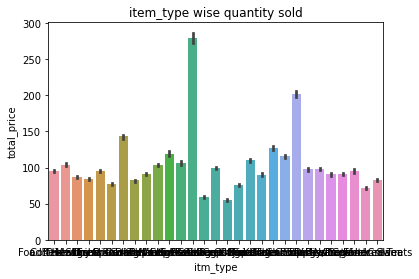

In [9]:
plt.title('item_type wise quantity sold')
sns.barplot(x =  add_item_and_time_with_fact['item_type'], y =  add_item_and_time_with_fact['total_price']);
plt.xlabel('itm_type')
plt.ylabel('total_price')

Text(0, 0.5, 'total_price')

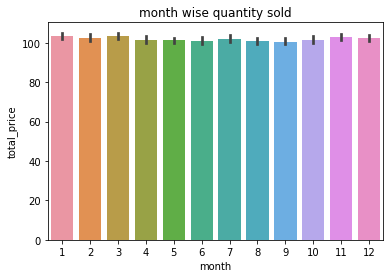

In [10]:
plt.title('month wise quantity sold')
sns.barplot(x =  add_item_and_time_with_fact['month'], y =  add_item_and_time_with_fact['total_price']);
plt.xlabel('month')
plt.ylabel('total_price')

In [25]:
import scikit_posthocs as sp
import numpy as np
from scipy import stats
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format

In [26]:
print("Hypoyhesis Testing Assume:, XX = Beverage-Gatorade, YY = Dishware-Cups Cold")

Hypoyhesis Testing Assume:, XX = Beverage-Gatorade, YY = Dishware-Cups Cold


In [27]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")  

In [28]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [29]:
groupby_and_aggr_of_table = add_item_and_time_with_fact.groupby(['month', 'item_type']).aggregate({'total_price':'mean'}).reset_index()

In [30]:
groupby_and_aggr_of_table

,month,item_type,total_price
0,1,Beverage - Energy/Protein,193.5066
1,1,Beverage - Gatorade,108.3767
2,1,Beverage - Iced Tea,102.0691
3,1,Beverage - Juice,102.5783
4,1,Beverage Water,74.1320
...,...,...,...
343,12,Gum - Mints,80.4636
344,12,Kitchen Supplies,112.5123
345,12,Medicine,90.1434
346,12,a. Beverage - Soda,66.6161


In [31]:
f1 = groupby_and_aggr_of_table

In [32]:
f1

,month,item_type,total_price
0,1,Beverage - Energy/Protein,193.5066
1,1,Beverage - Gatorade,108.3767
2,1,Beverage - Iced Tea,102.0691
3,1,Beverage - Juice,102.5783
4,1,Beverage Water,74.1320
...,...,...,...
343,12,Gum - Mints,80.4636
344,12,Kitchen Supplies,112.5123
345,12,Medicine,90.1434
346,12,a. Beverage - Soda,66.6161


In [33]:
item_xx =  f1.query('item_type == "Beverage - Gatorade"')
item_xx

,month,item_type,total_price
1,1,Beverage - Gatorade,108.3767
30,2,Beverage - Gatorade,98.5417
59,3,Beverage - Gatorade,92.6916
88,4,Beverage - Gatorade,116.5862
117,5,Beverage - Gatorade,107.7250
146,6,Beverage - Gatorade,107.4135
175,7,Beverage - Gatorade,110.9490
204,8,Beverage - Gatorade,108.2160
233,9,Beverage - Gatorade,101.8107
262,10,Beverage - Gatorade,114.3006


In [34]:
item_yy = f1.query('item_type=="Dishware - Cups Cold"')
item_yy

,month,item_type,total_price
14,1,Dishware - Cups Cold,94.4261
43,2,Dishware - Cups Cold,84.1085
72,3,Dishware - Cups Cold,93.3146
101,4,Dishware - Cups Cold,92.5532
130,5,Dishware - Cups Cold,86.7065
159,6,Dishware - Cups Cold,89.1963
188,7,Dishware - Cups Cold,93.5089
217,8,Dishware - Cups Cold,90.1623
246,9,Dishware - Cups Cold,91.7936
275,10,Dishware - Cups Cold,93.1471


In [35]:
check_normality(item_xx['total_price'])
check_normality(item_yy['total_price'])

p value:0.5685
Fail to reject null hypothesis >> The data is normally distributed
p value:0.2417
Fail to reject null hypothesis >> The data is normally distributed


In [36]:
check_variance_homogeneity(item_xx['total_price'], item_yy['total_price'])

p value:0.0914
Fail to reject null hypothesis >> The variances of the samples are same.


In [37]:
ttest, p_value = stats.ttest_ind(item_xx['total_price'], item_yy['total_price'], alternative='greater')
print("t value: %.3f, p value: %.8f" % (ttest, p_value))
print("p_value:%.4f" %(p_value))
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis") 

t value: 6.748, p value: 0.00000044
p_value:0.0000
Reject null hypothesis


In [41]:
add_item_and_time_customer_with_fact = pd.merge(pd.merge(pd.merge(fact_table,item_dim,on='item_key'),time_dim,on='time_key'),customer_dim,on='customer_key')

In [42]:
add_item_and_time_customer_with_fact

,payment_key,customer_key,time_key,item_key,store_key,quantity_sold,unit_x,unit_price_x,total_price,item_name,...,quarter,year,name,contact_no,nid,address,street,upazila,district,division
0,P017,C002961,T04782,I00196,S0016,6,ct,16.0000,96.0000,Fiber One 90 Calorie Fudge Brownies,...,Q3,2017,snah lata,8801935227943,3738866803931,"Bishwanath, Sylhet",Bishwanath,Bishwanath,Sylhet,Sylhet
1,P022,C002961,T04143,I00173,S0019,7,ct,19.0000,133.0000,Hershey Factory Favorites Mix,...,Q4,2015,snah lata,8801935227943,3738866803931,"Bishwanath, Sylhet",Bishwanath,Bishwanath,Sylhet,Sylhet
2,P006,C002961,T00020,I00123,S0012,6,ct,45.0000,270.0000,Honey Packets,...,Q4,2019,snah lata,8801935227943,3738866803931,"Bishwanath, Sylhet",Bishwanath,Bishwanath,Sylhet,Sylhet
3,P018,C002961,T00999,I00097,S0012,7,cartons,19.0000,133.0000,Vita Coconut Water 10oz,...,Q4,2016,snah lata,8801935227943,3738866803931,"Bishwanath, Sylhet",Bishwanath,Bishwanath,Sylhet,Sylhet
4,P036,C002961,T01516,I00217,S0011,6,oz,20.5000,123.0000,Unsalted Premium Blend Nuts,...,Q2,2019,snah lata,8801935227943,3738866803931,"Bishwanath, Sylhet",Bishwanath,Bishwanath,Sylhet,Sylhet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,P020,C006206,T00501,I00053,S0027,5,cans,40.0000,200.0000,Monster Original Green 16 oz,...,Q1,2019,kusum,8801898784613,9726610837937,"138,Nobaber Bagh,Mirpur -1,Dhaka-1216","138,Nobaber Bagh",Mirpur-1,Dhaka,Dhaka
99996,P010,C006206,T02636,I00219,S0006,6,ct,22.0000,132.0000,Wonderful Pistachios (in shell),...,Q2,2017,kusum,8801898784613,9726610837937,"138,Nobaber Bagh,Mirpur -1,Dhaka-1216","138,Nobaber Bagh",Mirpur-1,Dhaka,Dhaka
99997,P026,C006206,T03558,I00083,S0036,8,bottles,14.0000,112.0000,Ocean Spray Cranberry Juice Cocktail 15oz,...,Q3,2016,kusum,8801898784613,9726610837937,"138,Nobaber Bagh,Mirpur -1,Dhaka-1216","138,Nobaber Bagh",Mirpur-1,Dhaka,Dhaka
99998,P009,C006206,T04008,I00146,S0030,5,ct,21.0000,105.0000,Paper Plates 8.5 inch Ultra Strong,...,Q3,2020,kusum,8801898784613,9726610837937,"138,Nobaber Bagh,Mirpur -1,Dhaka-1216","138,Nobaber Bagh",Mirpur-1,Dhaka,Dhaka


In [45]:
groupby_and_aggr_of_table = add_item_and_time_customer_with_fact.groupby(['month', 'item_type','upazila','week']).aggregate({'total_price':'mean'}).reset_index()

In [46]:
groupby_and_aggr_of_table

,month,item_type,upazila,week,total_price
0,1,Beverage - Energy/Protein,Agargaon,2nd Week,151.0000
1,1,Beverage - Energy/Protein,Agargaon,3rd Week,212.0000
2,1,Beverage - Energy/Protein,Agargaon,4th Week,192.0000
3,1,Beverage - Energy/Protein,Bashundhara R/A,1st Week,141.6667
4,1,Beverage - Energy/Protein,Bashundhara R/A,2nd Week,36.0000
...,...,...,...,...,...
26558,12,a. Beverage Sparkling Water,Shyamoli,4th Week,39.5000
26559,12,a. Beverage Sparkling Water,Uttara,1st Week,78.0000
26560,12,a. Beverage Sparkling Water,Uttara,2nd Week,102.0000
26561,12,a. Beverage Sparkling Water,Uttara,3rd Week,153.6000


In [47]:
f1 = groupby_and_aggr_of_table

In [48]:
f1

,month,item_type,upazila,week,total_price
0,1,Beverage - Energy/Protein,Agargaon,2nd Week,151.0000
1,1,Beverage - Energy/Protein,Agargaon,3rd Week,212.0000
2,1,Beverage - Energy/Protein,Agargaon,4th Week,192.0000
3,1,Beverage - Energy/Protein,Bashundhara R/A,1st Week,141.6667
4,1,Beverage - Energy/Protein,Bashundhara R/A,2nd Week,36.0000
...,...,...,...,...,...
26558,12,a. Beverage Sparkling Water,Shyamoli,4th Week,39.5000
26559,12,a. Beverage Sparkling Water,Uttara,1st Week,78.0000
26560,12,a. Beverage Sparkling Water,Uttara,2nd Week,102.0000
26561,12,a. Beverage Sparkling Water,Uttara,3rd Week,153.6000


In [56]:
upazila_aa = f1.query('upazila=="Mirpur -1"')
upazila_bb = f1.query('upazila=="Pallabi"')
upazila_cc = f1.query('upazila=="Gournadi"')

In [57]:
check_normality(upazila_aa['total_price'])
check_normality(upazila_bb['total_price'])
check_normality(upazila_cc['total_price'])

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


In [58]:
def check_variance_homogeneity_three_groups(group1, group2, group3):
    test_stat_var, p_value_var= stats.levene(group1, group2, group3)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [59]:
F, p_value = stats.kruskal(upazila_aa['total_price'], upazila_bb['total_price'], upazila_cc['total_price'])
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.614621
Fail to reject null hypothesis


In [60]:
posthoc_df = sp.posthoc_mannwhitney([upazila_aa['total_price'], upazila_bb['total_price'], upazila_cc['total_price']], p_adjust='bonferroni')
group_names= ['Mirpur -1', 'Pallabi', 'Gournadi']
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

,Mirpur -1,Pallabi,Gournadi
Mirpur -1,1.000000,1.000000,1.000000
Pallabi,1.000000,1.000000,0.970588
Gournadi,1.000000,0.970588,1.000000
